### Results for training neural networks to recognise images and play games

Here I present results obtained for my 4th year Maths in Action project for the University of Warwick that studies neural networks and how they can be applied to image recognition tasks, as well as how they can be trained to play board games using Reinforcement Learning. In order to obtain results we will first have to load in the approriate routines and classes from the scripts containing the actual code. To start with I will load an initial version of the neural network code and show some results for it, then I will follow this up with an improved version of this code which should (hopefully) lead to better results. I then do the same for the Reinforcement Learning code by starting with an initial version of the code, then later on I will load in the improved version to show off some better results.

### Applying neural networks to the recognition of hand-written digits

In [44]:
#This loads and runs all the code from "NeuralNetworks.ipynb"
%run NeuralNetworks.ipynb

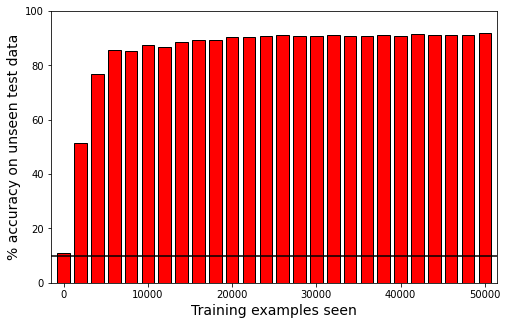

In [47]:
#Training a small network on MNIST data for a single run through the training data (partitioned in 25 sections).
#This usually takes around 15 seconds.
n1 = Network([784, 50, 10])
#Here we train with a mini batch size of 10 and a learning rate of 0.1.
accuracies0 = []
for i in range(25):
    current_training_data = training_data[i*2000:(i+1)*2000]
    acc = n1.SGD(current_training_data, 1, 10, 0.1, test_data_medium);
    if i == 0: accuracies0.append(acc[0])
    accuracies0.append(acc[1])
#Plotting the accuracies obtained during training.
plot_accuracies(accuracies0, 'red', [0,100], single_epoch = True)

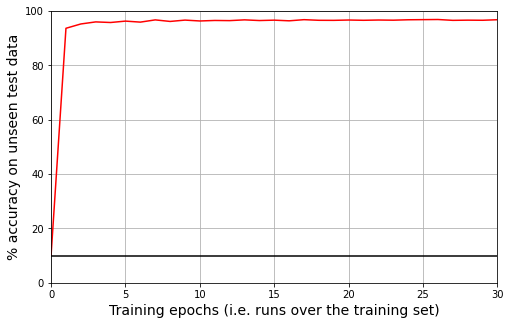

In [48]:
#Training an identical small network on MNIST data for 30 runs through the 50,000 training examples (i.e. 30 epochs).
#This should take about 5-10 minutes.
#For faster (~ 1 min) but slightly less accurate training, replace training_data with training_data_medium.
n1 = Network([784, 50, 10])
#Here we train with a mini batch size of 30 and a learning rate of 0.5.
accuracies1 = n1.SGD(training_data, 30, 10, 0.5, test_data)
#Here I plot the accuracies over each training epoch zoomed in to only show 90%-100% accuracies.
plot_accuracies(accuracies1, 'red', [0,100])

In [49]:
#Training a medium network on MNIST data for 30 epochs using the same hyperparameters as before.
n2 = Network([784, 80, 80, 10])
accuracies2 = n2.SGD(training_data, 30, 10, 0.5, test_data)

#Training a large network on MNIST data for 30 epochs using the same hyperparameters as before.
n3 = Network([784, 80, 80, 80, 80, 10])
accuracies3 = n3.SGD(training_data, 30, 10, 0.5, test_data)

#This will take about 30 mins unless training_data_medium is used in place of training_data, in which case it takes ~4 mins.
#However, when using training_data_medium the large network struggles to learn at all.

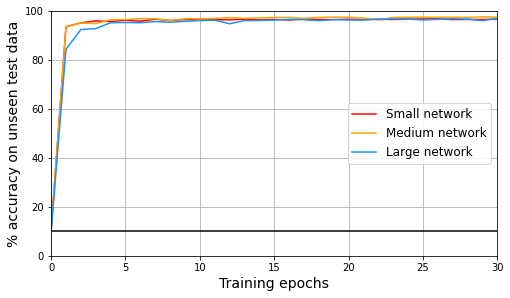

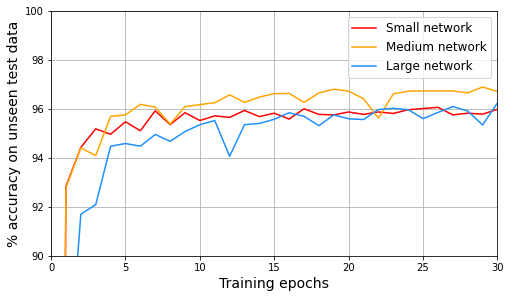

In [73]:
#Plotting the accuracies of all three networks over 30 epochs.
colors = ['red','orange','dodgerblue']
legend = ["Small network", "Medium network", "Large network"]
plot_multi_accuracies([accuracies1, accuracies2, accuracies3], colors, legend, [0, 100])
#Zooming in the same plot to only show accuracies from 90-100%.
plot_multi_accuracies([accuracies1, accuracies2, accuracies3], colors, legend, [90, 100])

### Using improved techniques to achieve higher accuracies

In [6]:
#This loads and runs all the code from "ImprovedNeuralNetworks.ipynb"
%run ImprovedNeuralNetworks.ipynb

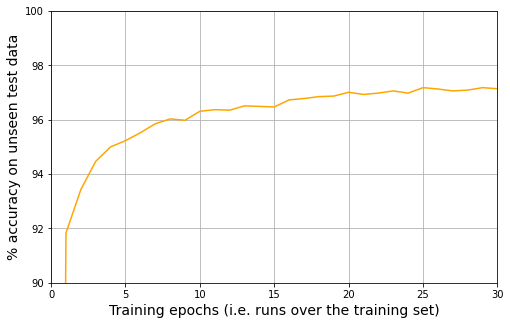

In [40]:
#Here we perform improved training using L2 regularisation and the leaky_ReLU activation function.
n4 = Network([784, 80, 80, 10], activation_function = leaky_ReLU)
#Our hyperparameters are the same as before except now we have regularisation hyperparemeter lambda = 0.1.
accuracies4 = n4.SGD(training_data, 30, 10, 0.01, test_data, lmbda = 0.01)
plot_accuracies(accuracies4, 'orange', [90,100])

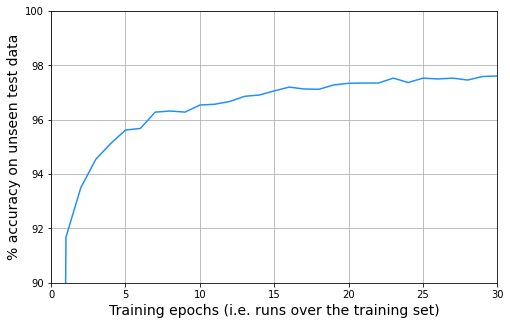

In [35]:
#Here we make use of dropout (along with the leaky ReLU activation function).
n5 = Network([784, 80, 80, 10], dropout_frequency = 0.3, activation_function = leaky_ReLU)
#Our dropout frequency is 0.3 so approximately one third of hidden nodes will be dropped out during each step of gradient descent.
accuracies5 = n5.SGD(training_data, 30, 10, 0.01, test_data, lmbda = 0)
plot_accuracies(accuracies5, 'dodgerblue', [90,100])

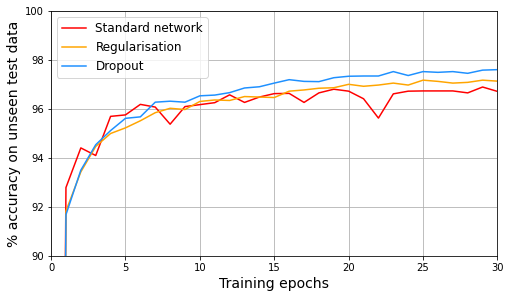

In [64]:
#Here I plot the above two accuracies for the above two networks using regularisation and dropout+regularisation
#against the medium network from earlier
colors = ['red','orange','dodgerblue']
legend = ["Standard network", "Regularisation", "Dropout"]
plot_multi_accuracies([accuracies2, accuracies4, accuracies5], colors, legend, [90, 100])

In [37]:
#Here we train a convolutional neural network over 30 epochs (this takes around an hour).

#The convolutional layer is the first layer; the other two are fully connected with sizes 512 and 10 each.
#In order the parameters in the first layer [28, 28, 8, 5, 3, 3] tell the code that:
#There are 28 rows and 28 columns in the input activations to the layer;
#We want 8 filters in the convolutional layer of size 5x5 each;
#We will use a pooling window of size 3x3 afterwards with a stride of 3 (i.e. 3 rows and columns between each window placement).
n6 = Network([[28, 28, 8, 5, 3, 3], 512, 10], leaky_ReLU)

#Here I use the same hyperparameters as before with a regularisation constant of 0.1.
#This typically takes a long time (at least an hour).
accuracies6 = n6.SGD(training_data, 30, 10, 0.01, test_data, lmbda = 0.1)

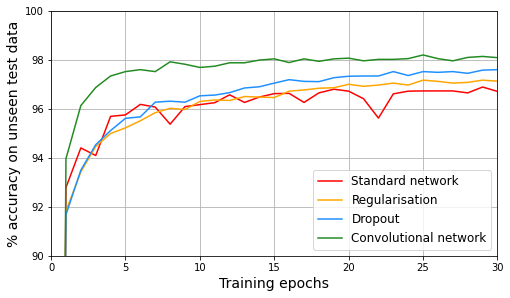

In [66]:
#Here I present the accuracies of the four best networks all on the same plot.
colors = ['red','orange','dodgerblue', 'forestgreen']
legend = ["Standard network", "Regularisation", "Dropout", "Convolutional network"]
plot_multi_accuracies([accuracies2, accuracies4, accuracies5, accuracies6], colors, legend, [90, 100])

### Training neural networks to play games using Reinforcement Learning

In [12]:
#This loads and runs all the code from "ReinforcementLearning.ipynb", "ImprovedNeuralNetworks.ipynb" and "GameCode.ipynb".
%run ReinforcementLearning.ipynb
%run ImprovedNeuralNetworks.ipynb
%run GameCode.ipynb

Games left:  100000
Games left:  90000
Games left:  80000
Games left:  70000
Games left:  60000
Games left:  50000
Games left:  40000
Games left:  30000
Games left:  20000
Games left:  10000


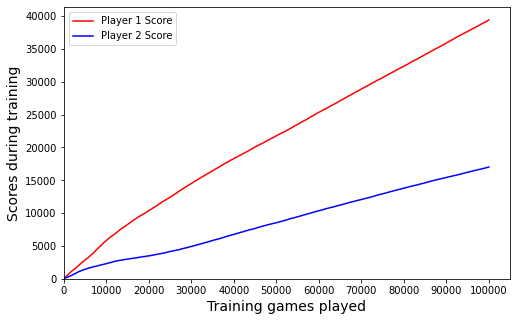

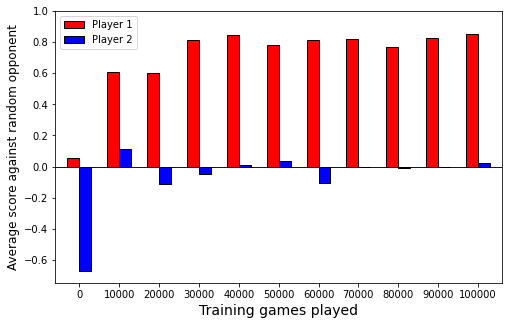

In [13]:
#Trying out basic Q-learning for noughts and crosses.
game = "noughts and crosses"
#Here both players use an epsilon-greedy strategy with epsilon=0.3.
#Also the activation function used by each network is leaky ReLU.
p1 = Network([9, 80, 80, 9], exploration_type = "epsilon-greedy", exploration_parameter = 0.3, game = game, activation_function = leaky_ReLU)
p2 = Network([9, 80, 80, 9], exploration_type = "epsilon-greedy", exploration_parameter = 0.3, game = game, activation_function = leaky_ReLU)

#Here we train for 100,000 games with a learning rate of 0.001 and a discounting factor of 0.75.
#This typically takes ~5 mins.
stats1 = Qlearn(100000, 0.001, 0.75, lmbda = 0, evaluate = True, save_stats = True, p1 = p1, p2 = p2)
plot_stats(stats1)

Games left:  250000
Games left:  225000
Games left:  200000
Games left:  175000
Games left:  150000
Games left:  125000
Games left:  100000
Games left:  75000
Games left:  50000
Games left:  25000


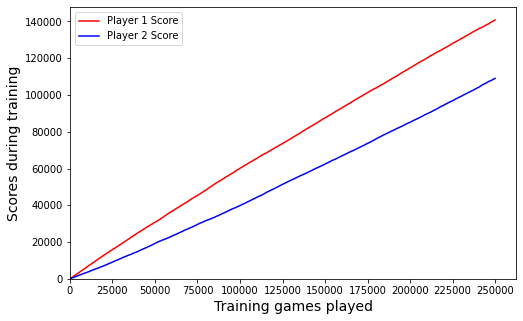

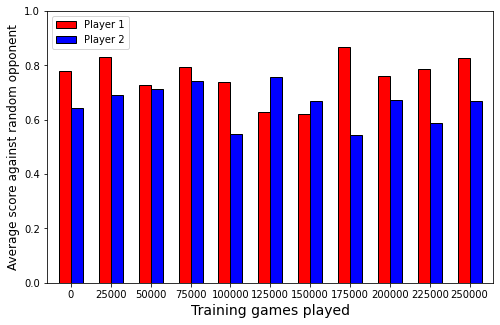

In [14]:
#Trying out basic Q-learning for Connect 4.
game = "connect 4"
#Here both players use an epsilon-greedy strategy with epsilon=0.2.
#Also the activation function used by each network is leaky ReLU.
p3 = Network([42, 80, 80, 7], exploration_type = "epsilon-greedy", exploration_parameter = 0.2, game = game, activation_function = leaky_ReLU)
p4 = Network([42, 80, 80, 7], exploration_type = "epsilon-greedy", exploration_parameter = 0.2, game = game, activation_function = leaky_ReLU)

#Here we train for 250,000 games with a learning rate of 0.001 and a discounting factor of 0.5 (anything higher than 0.5 leads to instability).
#This typically takes ~30 mins.
stats2 = Qlearn(250000, 0.001, 0.5, lmbda = 0, evaluate = True, save_stats = True, p1 = p3, p2 = p4)
plot_stats(stats2)

### Improved neural network Reinforcement Learning

In [79]:
#This loads and runs all the code from "ReinforcementLearning.ipynb", "ImprovedNeuralNetworks.ipynb" and "GameCode.ipynb".
%run ImprovedReinforcementLearning.ipynb
%run ImprovedNeuralNetworks.ipynb
%run GameCode.ipynb

Games left:  100000
Games left:  90000
Games left:  80000
Games left:  70000
Games left:  60000
Games left:  50000
Games left:  40000
Games left:  30000
Games left:  20000
Games left:  10000


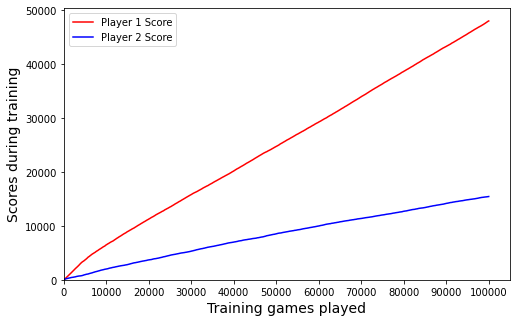

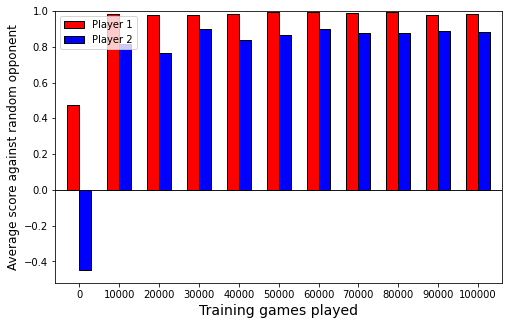

In [16]:
#Trying out improved reinforcement learning for noughts and crosses.
#Now we've added: experience replay, better exploration, data augmentation and target networks.
game = "noughts and crosses"
p5 = Network([9, 80, 80, 9], exploration_type = "adaptive-greedy", exploration_parameter = 0.5, game = game, activation_function = leaky_ReLU)
p6 = Network([9, 80, 80, 9], exploration_type = "adaptive-greedy", exploration_parameter = 0.5, game = game, activation_function = leaky_ReLU)

#Here we train for 100,000 games using "adaptive-greedy" exploration with an exploration temperature of 0.5.
#We perform experience replay every 3 games with an experience buffer of size 50.
#Also our learning rate is 0.005 and our discounting factor is 0.75.
#This typically takes ~10 mins.
stats3 = Qlearn(100000, 0.005, 0.75, lmbda = 0, games_per_update = 3, p1 = p5, p2 = p6, evaluate = True, save_stats = True, er_batch_size = 1, max_buffer_size = 50)   
plot_stats(stats3)

In [91]:
#Game of noughts and crosses between the two above networks.
#This is taken from the end of training.
from IPython.display import HTML
HTML("""
    <video width="500" height="400" controls>
    <source src="Replays/noughts_and_crosses_game.mp4" type="video/mp4">
    </video>
""")

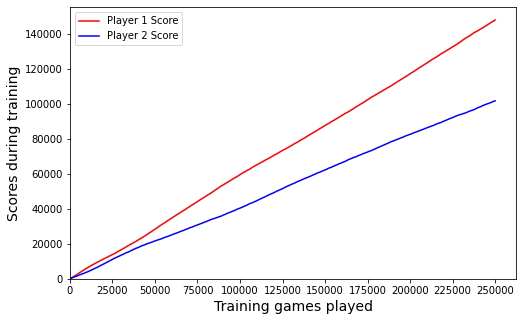

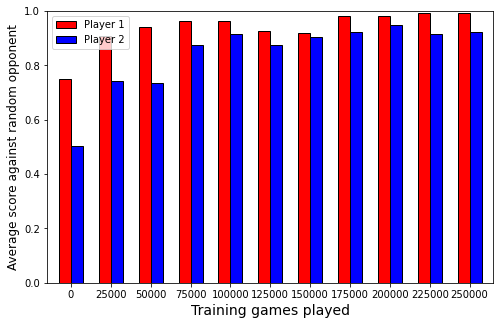

In [29]:
#Trying out improved reinforcement learning for Connect 4.
#Now we've added: experience replay, better exploration, data augmentation, reward clipping and target networks.
game = "connect 4"
p7 = Network([42, 80, 80, 7], exploration_type = "adaptive-greedy", exploration_parameter = 0.75, game = game, activation_function = leaky_ReLU)
p8 = Network([42, 80, 80, 7], exploration_type = "adaptive-greedy", exploration_parameter = 0.75, game = game, activation_function = leaky_ReLU)

#Here we train for 250,000 games using "adaptive-greedy" exploration with an exploration temperature of 0.75.
#We perform experience replay every 3 games with an experience buffer of size 30.
#Also our learning rate is 0.005 and our discounting factor is 0.9.
#This typically takes ~25 mins.
stats4 = Qlearn(250000, 0.005, 0.9, lmbda = 0, games_per_update = 3, p1 = p7, p2 = p8, evaluate = True, save_stats = True, er_batch_size = 1, max_buffer_size = 30)   
plot_stats(stats4)

In [90]:
#Game-play between two the two above networks at the end of training.
from IPython.display import HTML
HTML("""
    <video width="500" height="400" controls>
    <source src="Replays/standard_nets_final_game.mp4" type="video/mp4">
    </video>
""")

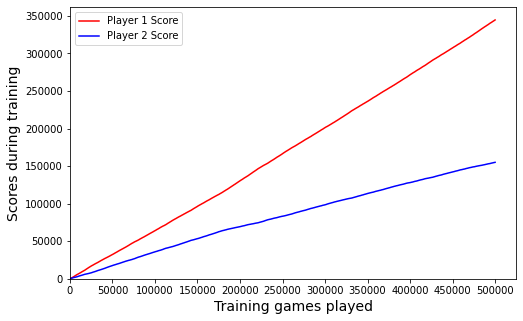

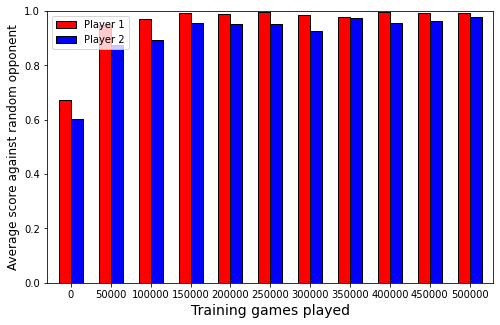

In [25]:
#Trying out improved reinforcement learning for connect 4 (experience replay, better exploration, reward clipping, target netorks).
#Here we combine this with a convolutional network as well to obtain even better results.
game = "connect 4"

#Here our convolutional layer has an input array with 6 rows and 7 columns (i.e. the board state).
#Our convolutional layer uses 5 filters of size 4x4 each.
#Note that we don't use any pooling since we need our network to know the exact positions of the pieces in the board.
p9 = Network([[6, 7, 5, 4], 450, 50, 7], padding = True, exploration_type = "adaptive-greedy", exploration_parameter = 0.75, game = game, activation_function = leaky_ReLU)
p10 = Network([[6, 7, 5, 4], 450, 50, 7], padding = True, exploration_type = "adaptive-greedy", exploration_parameter = 0.75, game = game, activation_function = leaky_ReLU)

#Here we train for 500,000 games using "adaptive-greedy" exploration with an exploration temperature of 0.75.
#We perform experience replay every 3 games with an experience buffer of size 25.
#Also our learning rate is 0.005 and our discounting factor is 0.9.
#This typically takes a very long time (3+ hours).
stats5 = Qlearn(500000, 0.005, 0.9, lmbda = 0, p1 = p9, p2 = p10, evaluate = True, save_stats = True, games_per_update = 3, er_batch_size = 1, max_buffer_size = 25)   
plot_stats(stats5)

In [16]:
#Highest level game-play between two fully trained convolutional neural networks.
#This is taken from the end of training.
from IPython.display import HTML
HTML("""
    <video width="500" height="400" controls>
    <source src="Replays/convolutional_nets_final_game.mp4" type="video/mp4">
    </video>
""")

### Appendix: Improving learning for larger networks using batch normalisation

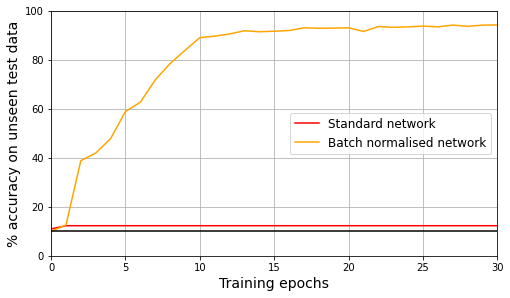

In [19]:
#Attempt at training a deep sigmoid network without batch normalisation.
n7 = Network([784, 80, 80, 80, 80, 80, 10], activation_function = sigmoid)
#Here we train for 30 epochs with a mini batch size of 10, a learning rate of 0.05 and a regularisation constant of 0.5.
accuracies7 = n7.SGD(training_data, 30, 10, 0.01, test_data_medium, lmbda = 0.5)

#Training the same deep network with batch normalisation enabled.
n8 = Network([784, 80, 80, 80, 80, 80, 10], activation_function = sigmoid, batch_normalisation = True)
#Again we train for 30 epochs with a mini batch size of 10, a learning rate of 0.05 and a regularisation constant of 0.5.
accuracies8 = n8.SGD(training_data, 30, 10, 0.01, test_data_medium, lmbda = 0.5)

#Plotting the accuracies from both sets of training.
colors = ['red','orange']
legend = ["Standard network", "Batch normalised network"]
plot_multi_accuracies([accuracies7, accuracies8], colors, legend, [0, 100])